In [1]:
import pandas as pd
import random
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [2]:
class CFG:
    SEED = 42

In [3]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(CFG.SEED) # Seed 고정

In [4]:
train = pd.read_csv('데이콘_유전체/open (1)/train.csv')
test = pd.read_csv('데이콘_유전체/open (1)/test.csv')

In [5]:
def get_x_y(df):
    if 'class' in df.columns:
        df_x = df.drop(columns=['id', 'class'])
        df_y = df['class']
        return df_x, df_y
    else:
        df_x = df.drop(columns=['id'])
        return df_x

In [6]:
x_train, y_train = get_x_y(train)
x_test = get_x_y(test)

In [7]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in train.columns :
    train[col] = labelencoder.fit_transform(train[col])
train.head()
for col in test.columns :
    test[col] = labelencoder.fit_transform(test[col])
test.head()

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15
0,0,0,0,0,0,1,2,0,1,0,1,2,1,1,1,1,1,2,1,1
1,1,0,0,0,1,2,1,2,2,2,0,0,0,0,2,1,0,0,0,0
2,2,0,0,0,1,2,1,0,0,1,1,0,0,0,1,0,1,2,0,2
3,3,0,0,0,1,2,1,1,0,2,0,0,0,0,2,0,1,1,0,0
4,4,0,0,0,0,0,2,0,2,0,2,2,0,2,1,2,1,2,0,2


In [8]:
y_train = train['class'].values
x_train = train.drop(['class'], axis=1)
x1 = x_train.values
x1 = (x1 - x1.min()) / (x1.max() - x1.min())

In [9]:
x_test = test.iloc[:,5:]

In [10]:
x2 = x_test.values
x2 = (x2 - x2.min()) / (x2.max() - x2.min())

In [11]:
x_train = x_train.iloc[:,4:]

In [12]:
x_test = test.iloc[:,4:]

In [13]:
x_train = x_train.values
x_test = x_test.values

In [14]:
from keras import regularizers

In [15]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(units = 8, activation = 'ReLU', input_shape=(16,)),
        tf.keras.layers.Dense(units = 16, activation = 'ReLU'),
        tf.keras.layers.Dense(units = 32, activation = 'ReLU'),
        tf.keras.layers.Dense(units = 16, activation = 'ReLU'),
        tf.keras.layers.Dense(units = 3, activation = 'softmax')
  ])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
            loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpoint = ModelCheckpoint("checkpoint", monitor='accuracy', verbose=1, save_best_only=True )
early = EarlyStopping(monitor='accuracy', patience=10, verbose=1, mode='auto')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 136       
                                                                 
 dense_1 (Dense)             (None, 16)                144       
                                                                 
 dense_2 (Dense)             (None, 32)                544       
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 3)                 51        
                                                                 
Total params: 1,403
Trainable params: 1,403
Non-trainable params: 0
_________________________________________________________________


D:\anaconda\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [16]:
hist = model.fit(x_train,y_train,callbacks=[early],epochs=70)

Epoch 1/70
9/9 [==============================] - 1s 3ms/step - loss: 1.1063 - accuracy: 0.3702
Epoch 2/70
9/9 [==============================] - 0s 3ms/step - loss: 1.0088 - accuracy: 0.5420
Epoch 3/70
9/9 [==============================] - 0s 3ms/step - loss: 0.9242 - accuracy: 0.6641
Epoch 4/70
9/9 [==============================] - 0s 3ms/step - loss: 0.8405 - accuracy: 0.6832
Epoch 5/70
9/9 [==============================] - 0s 4ms/step - loss: 0.7594 - accuracy: 0.6870
Epoch 6/70
9/9 [==============================] - 0s 3ms/step - loss: 0.6875 - accuracy: 0.7023
Epoch 7/70
9/9 [==============================] - 0s 3ms/step - loss: 0.6284 - accuracy: 0.7099
Epoch 8/70
9/9 [==============================] - 0s 3ms/step - loss: 0.5829 - accuracy: 0.7176
Epoch 9/70
9/9 [==============================] - 0s 3ms/step - loss: 0.5476 - accuracy: 0.7290
Epoch 10/70
9/9 [==============================] - 0s 3ms/step - loss: 0.5190 - accuracy: 0.7557
Epoch 11/70
9/9 [======================

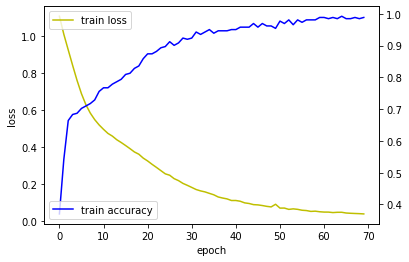

In [17]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label = 'train loss')
# loss_ax.plot(hist.history['val_loss'], 'r', label = 'val loss')
acc_ax.plot(hist.history['accuracy'], 'b', label = 'train accuracy')
# acc_ax.plot(hist.history['val_accuracy'], 'g', label = 'val accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_xlabel('accuracy')

loss_ax.legend(loc = 'upper left')
acc_ax.legend(loc = 'lower left')

plt.show()

In [18]:
preds = model.predict(x_test)
print('Done.')

6/6 [==============================] - 0s 2ms/step
Done.


In [19]:
submit = pd.read_csv('데이콘_유전체/open (1)/sample_submission.csv')

In [20]:
result = []
for i in range(len(preds)) :
    if np.argmax(preds[i]) == 0 :
        result.append('A')
    elif np.argmax(preds[i]) == 1 :
        result.append('B')
    elif np.argmax(preds[i]) == 2 :
        result.append('C')

In [21]:
submit['class'] = result

In [25]:
submit.to_csv('데이콘_유전체/제출/submit.csv', index=False)